In [1]:
#from google.colab import drive    
#drive.mount('/content/gdrive/')

# Business understanding

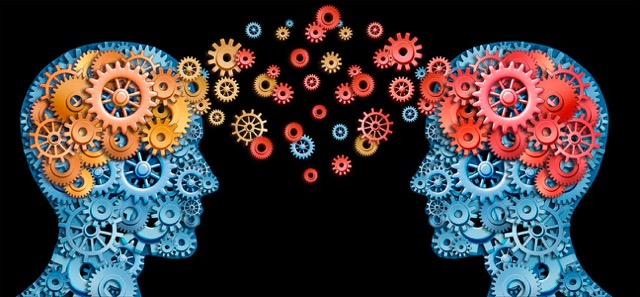

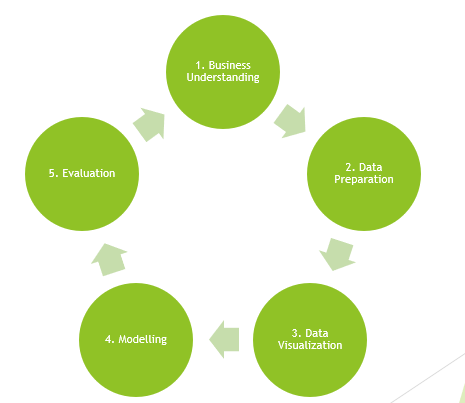

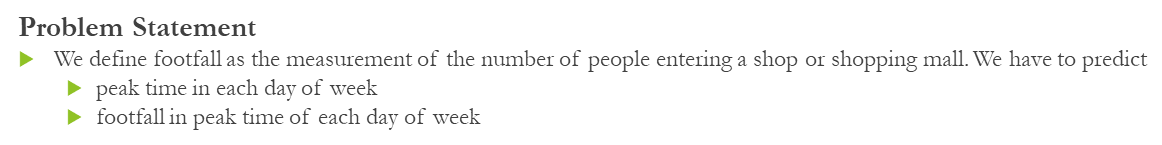

# Data Acquisition 

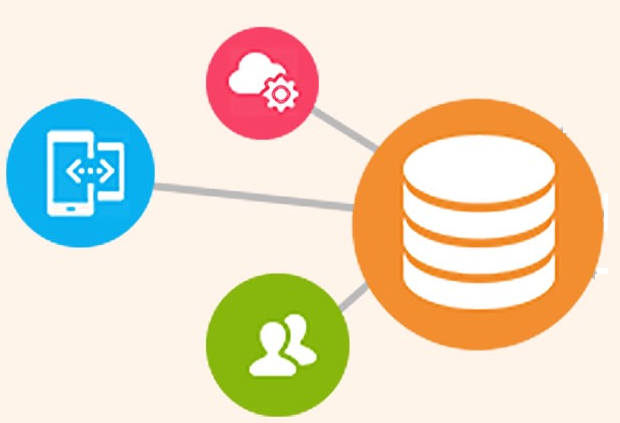

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from zipfile import ZipFile
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import sys
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks/LSTM/Mall Footfall prediction')
#!unzip '/content/gdrive/My Drive/Colab Notebooks/LSTM/Mall Footfall prediction/lcc-footfall.zip' -d .
#from zipfile import ZipFile

In [3]:
# SY- Commented below lines to directly read from a public repo
#FOOTFALL_DATA = "data/footfall_data/footfall.csv"
#WEATHER_DATA = "data/weather_data/overall_weather.csv"
#EASTER_SUNDAYS_HOLIDAYS_DATA = "data/holiday_data/Easter-Sundays.csv"
#UK_BANK_HOLIDAYS_DATA = "data/holiday_data/UKbankholidays.csv"
#UNIVERSITY_LONG_HOLIDAYS_DATA = "data/holiday_data/uni_hols_long.csv"
#SCHOOL_LONG_HOLIDAYS_DATA = "data/holiday_data/school_hols_long.csv"

# SY- Added below lines to read the data from a public repository
mainpath='https://raw.githubusercontent.com/syeelarthi/Footfall-prediction-code/master/'
df1 = pd.read_csv(mainpath+'footfall_Part1.csv')
df2 = pd.read_csv(mainpath+'footfall_Part2.csv')
df3 = pd.read_csv(mainpath+'footfall_Part3.csv')
foot_fall_df=pd.concat([df1,df2,df3])
df_weather_data= pd.read_csv(mainpath+'overall_weather.csv')
df_easter_sunday_holiday_data= pd.read_csv(mainpath+'Easter-Sundays.csv')
df_university_long_holidays_data= pd.read_csv(mainpath+'uni_hols_long.csv')
df_UK_bank_holidays_data= pd.read_csv(mainpath+'UKbankholidays.csv')
df_school_long_holidays_data= pd.read_csv(mainpath+'school_hols_long.csv')

# Data preparation

In [4]:
#foot_fall_df = pd.read_csv(FOOTFALL_DATA) 
foot_fall_df.shape


(554360, 15)

In [5]:
foot_fall_df.info

<bound method DataFrame.info of               Date  InCount  BRCWeek          LocationName  Hour   Weekday  \
0       01-01-2009      268       53              Briggate     0  Thursday   
1       01-01-2009      366       53              Briggate     1  Thursday   
2       01-01-2009      273       53              Briggate     2  Thursday   
3       01-01-2009      219       53              Briggate     3  Thursday   
4       01-01-2009      132       53              Briggate     4  Thursday   
...            ...      ...      ...                   ...   ...       ...   
154357  31-12-2016      205       52  CommercialStBarratts    23  Saturday   
154358  31-12-2016      405       52               Headrow    23  Saturday   
154359  31-12-2016      353       52            DortmundSq    23  Saturday   
154360  31-12-2016      348       52         AlbionStSouth    23  Saturday   
154361  31-12-2016      316       52         AlbionStNorth    23  Saturday   

          NewDate  Month  Year 

In [6]:
foot_fall_df.head()

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
0,01-01-2009,268,53,Briggate,0,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
1,01-01-2009,366,53,Briggate,1,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
2,01-01-2009,273,53,Briggate,2,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
3,01-01-2009,219,53,Briggate,3,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
4,01-01-2009,132,53,Briggate,4,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1


In [7]:
foot_fall_df.tail()

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
154357,31-12-2016,205,52,CommercialStBarratts,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
154358,31-12-2016,405,52,Headrow,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
154359,31-12-2016,353,52,DortmundSq,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
154360,31-12-2016,348,52,AlbionStSouth,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52
154361,31-12-2016,316,52,AlbionStNorth,23,Saturday,31-Dec-16,12,2016,31,Saturday/31-Dec-2016,Dec-16,52-2016,"00, 31-Dec-2016",52


In [8]:
#df_weather_data = pd.read_csv(WEATHER_DATA)
df_weather_data.shape


(2282, 8)

In [9]:
df_weather_data.head()

,Date,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind
0,01-01-2011,0.0,0.0,0.0,0,0,1,0
1,02-01-2011,0.0,0.0,0.0,0,0,1,0
2,03-01-2011,0.0,0.0,0.0,0,0,1,0
3,04-01-2011,5.7,0.0,0.3,0,0,0,0
4,05-01-2011,5.1,0.6,0.3,0,0,1,0


In [10]:
df_weather_data.tail()

,Date,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind
2277,27-03-2017,0.0,0.0,0.0,0,0,1,0
2278,28-03-2017,0.0,0.0,0.0,0,0,1,0
2279,29-03-2017,0.0,0.0,0.0,0,0,1,0
2280,30-03-2017,0.0,0.0,0.0,0,0,1,0
2281,31-03-2017,0.0,0.0,0.0,0,0,1,0


weather data is available from 01-01-2011 until 31-03-2017

In [11]:
#df_easter_sunday_holiday_data = pd.read_csv(EASTER_SUNDAYS_HOLIDAYS_DATA)
df_easter_sunday_holiday_data.shape



(18, 2)

In [12]:
df_easter_sunday_holiday_data.head(20)

,Date,Holidays
0,04-23-2000,Y
1,04-15-2001,Y
2,03-31- 2002,Y
3,04-20-2003,Y
4,04-11-2004,Y
5,03-27-2005,Y
6,04-16-2006,Y
7,04-08-2007,Y
8,03-23-2008,Y
9,04-12-2009,Y


In [13]:
#df_UK_bank_holidays_data = pd.read_csv(UK_BANK_HOLIDAYS_DATA)
df_UK_bank_holidays_data.shape

(908, 2)

In [14]:
df_UK_bank_holidays_data.head()

,Date,Holidays
0,01-Jan-98,Y
1,10-Apr-98,Y
2,13-Apr-98,Y
3,04-May-98,Y
4,25-May-98,Y


In [15]:
df_UK_bank_holidays_data.tail()

,Date,Holidays
903,05-May-10,Y
904,26-May-10,Y
905,25-Aug-10,Y
906,25-Dec-10,Y
907,26-Dec-10,Y


Bank holidays data is available from 01-Jan-98 until 26-Dec-2010

In [16]:
#df_university_long_holidays_data = pd.read_csv(UNIVERSITY_LONG_HOLIDAYS_DATA)
df_university_long_holidays_data.shape



(1969, 2)

In [17]:
df_university_long_holidays_data.head()

,Date,Holidays
0,10-Dec-04,Y
1,11-Dec-04,Y
2,12-Dec-04,Y
3,13-Dec-04,Y
4,14-Dec-04,Y


In [18]:
df_university_long_holidays_data.tail()

,Date,Holidays
1964,17-Sep-16,Y
1965,18-Sep-16,Y
1966,19-Sep-16,Y
1967,20-Sep-16,Y
1968,21-Sep-16,Y


In [19]:
#df_school_long_holidays_data = pd.read_csv(SCHOOL_LONG_HOLIDAYS_DATA)
df_school_long_holidays_data.shape



(1195, 2)

In [20]:
df_school_long_holidays_data.head()

,Date,Holidays
0,24-Oct-05,Y
1,25-Oct-05,Y
2,26-Oct-05,Y
3,27-Oct-05,Y
4,28-Oct-05,Y


In [21]:
df_school_long_holidays_data.tail()

,Date,Holidays
1190,31-Aug-17,Y
1191,01-Sep-17,Y
1192,02-Sep-17,Y
1193,03-Sep-17,Y
1194,04-Sep-17,Y


# **Summary of available data timelines**

Mall foot fall data : 01-01-2009 till 31-12-2016

weather data : 01-01-2011 until 31-03-2017

Easter Sunday holidays : 2000 till 2017

Bank holidays data :  01-Jan-98 until 26-Dec-2010

University long holidays : 2004 till 2016

School long holidays : 2005 till 2017




# Data consistency check

In [22]:
#Checking if there are any null values in the dataset
foot_fall_df.isnull().sum()

Date            0
InCount         0
BRCWeek         0
LocationName    0
Hour            0
Weekday         0
NewDate         0
Month           0
Year            0
Day             0
Day_yr          0
Month_yr        0
Week_yr         0
Hour_yr         0
week_no         0
dtype: int64

No null values, that's good

In [23]:
# check if the Incount is negative for any rows
foot_fall_df[(foot_fall_df['InCount'] < 0)].count()

Date            0
InCount         0
BRCWeek         0
LocationName    0
Hour            0
Weekday         0
NewDate         0
Month           0
Year            0
Day             0
Day_yr          0
Month_yr        0
Week_yr         0
Hour_yr         0
week_no         0
dtype: int64

In [24]:
# check if the Incount is negative for any rows
foot_fall_df[(foot_fall_df['InCount'] == 0)].head(20)

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
52,01-01-2009,0,53,AlbionStNorth,4,Thursday,01-Jan-09,1,2009,1,Thursday/01-Jan-2009,Jan-09,00-2009,"00, 01-Jan-2009",1
266,02-01-2009,0,53,CommercialStLush,2,Friday,02-Jan-09,1,2009,2,Friday/02-Jan-2009,Jan-09,00-2009,"00, 02-Jan-2009",1
267,02-01-2009,0,53,CommercialStLush,3,Friday,02-Jan-09,1,2009,2,Friday/02-Jan-2009,Jan-09,00-2009,"00, 02-Jan-2009",1
892,06-01-2009,0,2,AlbionStNorth,4,Tuesday,06-Jan-09,1,2009,6,Tuesday/06-Jan-2009,Jan-09,Jan-09,"00, 06-Jan-2009",1
1107,07-01-2009,0,2,CommercialStLush,3,Wednesday,07-Jan-09,1,2009,7,Wednesday/07-Jan-2009,Jan-09,Jan-09,"00, 07-Jan-2009",1
1108,07-01-2009,0,2,CommercialStLush,4,Wednesday,07-Jan-09,1,2009,7,Wednesday/07-Jan-2009,Jan-09,Jan-09,"00, 07-Jan-2009",1
1275,08-01-2009,0,2,CommercialStLush,3,Thursday,08-Jan-09,1,2009,8,Thursday/08-Jan-2009,Jan-09,Jan-09,"00, 08-Jan-2009",2
2068,13-01-2009,0,3,AlbionStNorth,4,Tuesday,13-Jan-09,1,2009,13,Tuesday/13-Jan-2009,Jan-09,Feb-09,"00, 13-Jan-2009",2
2404,15-01-2009,0,3,AlbionStNorth,4,Thursday,15-Jan-09,1,2009,15,Thursday/15-Jan-2009,Jan-09,Feb-09,"00, 15-Jan-2009",3
3076,19-01-2009,0,4,AlbionStNorth,4,Monday,19-Jan-09,1,2009,19,Monday/19-Jan-2009,Jan-09,Mar-09,"00, 19-Jan-2009",3


Seems to be okay as during the early hours , people might not come to the mall

In [25]:
# check if the Incount is 0 between 8.00AM and 10.00PM
foot_fall_df[(foot_fall_df['InCount'] == 0) & ((foot_fall_df['Hour'] > 7) & (foot_fall_df['Hour'] < 11)) ].head(20)

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,Day_yr,Month_yr,Week_yr,Hour_yr,week_no
16568,09-04-2009,0,15,CommercialStLush,8,Thursday,09-Apr-09,4,2009,9,Thursday/09-Apr-2009,Apr-09,14-2009,"00, 09-Apr-2009",15
16569,09-04-2009,0,15,CommercialStLush,9,Thursday,09-Apr-09,4,2009,9,Thursday/09-Apr-2009,Apr-09,14-2009,"00, 09-Apr-2009",15
64016,25-12-2009,0,52,Briggate,8,Friday,25-Dec-09,12,2009,25,Friday/25-Dec-2009,Dec-09,51-2009,"00, 25-Dec-2009",52
64064,25-12-2009,0,52,AlbionStNorth,8,Friday,25-Dec-09,12,2009,25,Friday/25-Dec-2009,Dec-09,51-2009,"00, 25-Dec-2009",52
64088,25-12-2009,0,52,AlbionStSouth,8,Friday,25-Dec-09,12,2009,25,Friday/25-Dec-2009,Dec-09,51-2009,"00, 25-Dec-2009",52
134168,25-12-2010,0,51,AlbionStSouth,8,Saturday,25-Dec-10,12,2010,25,Saturday/25-Dec-2010,Dec-10,51-2010,"00, 25-Dec-2010",52
4249,25-12-2011,0,51,AlbionStSouth,8,Sunday,25-Dec-11,12,2011,25,Sunday/25-Dec-2011,Dec-11,51-2011,"00, 25-Dec-2011",52
4657,27-12-2011,0,52,CommercialStBarratts,8,Tuesday,27-Dec-11,12,2011,27,Tuesday/27-Dec-2011,Dec-11,52-2011,"00, 27-Dec-2011",52
4658,27-12-2011,0,52,CommercialStBarratts,9,Tuesday,27-Dec-11,12,2011,27,Tuesday/27-Dec-2011,Dec-11,52-2011,"00, 27-Dec-2011",52
4659,27-12-2011,0,52,CommercialStBarratts,10,Tuesday,27-Dec-11,12,2011,27,Tuesday/27-Dec-2011,Dec-11,52-2011,"00, 27-Dec-2011",52


Interestingly, there are some days ( especially Christmas day), people go to malls late

In [26]:
df_weather_data.isnull().sum()


Date             0
mean_temp        0
rain             0
wind_speed       0
abnormal_rain    0
high_temp        0
low_temp         0
high_wind        0
dtype: int64

In [27]:
df_weather_data.head(5)

,Date,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind
0,01-01-2011,0.0,0.0,0.0,0,0,1,0
1,02-01-2011,0.0,0.0,0.0,0,0,1,0
2,03-01-2011,0.0,0.0,0.0,0,0,1,0
3,04-01-2011,5.7,0.0,0.3,0,0,0,0
4,05-01-2011,5.1,0.6,0.3,0,0,1,0


# Merge different data frame based on the dates

In [28]:
# Merge weather data and foot fall data based on date
data_final = foot_fall_df.merge(df_weather_data, how='inner', left_on='Date', right_on='Date')

In [29]:
data_final.shape

(413168, 22)

# Add a new column for Easter holiday sundays


In [30]:
# there is a white space in one of the date values in Easter holidays list. We need to remove that
df_easter_sunday_holiday_data['Date'] = df_easter_sunday_holiday_data['Date'].str.replace(' ', '') 


In [31]:
from datetime import datetime

data_final['Date_New'] = pd.to_datetime(data_final['Date'], format = '%d-%m-%Y').dt.strftime('%d/%m/%Y')
df_easter_sunday_holiday_data['Date_New'] = pd.to_datetime(df_easter_sunday_holiday_data['Date'],format = '%m-%d-%Y').dt.strftime('%d/%m/%Y')

data_final['EasterSundayHoliday'] = (data_final.set_index(['Date_New']).index.isin(df_easter_sunday_holiday_data.set_index(['Date_New']).index)).astype(int)
df_easter_sunday_holiday_data.drop(['Date_New'],axis=1)
print(data_final[data_final['Date'] == '31-03-2013']) # example to check if the coolumn is updated corrctly


              Date  InCount  BRCWeek LocationName  Hour Weekday    NewDate  \
157440  31-03-2013      720       13     Briggate     0  Sunday  31-Mar-13   
157441  31-03-2013        0       13     Briggate     1  Sunday  31-Mar-13   
157442  31-03-2013      669       13     Briggate     2  Sunday  31-Mar-13   
157443  31-03-2013      568       13     Briggate     3  Sunday  31-Mar-13   
157444  31-03-2013      563       13     Briggate     4  Sunday  31-Mar-13   
...            ...      ...      ...          ...   ...     ...        ...   
157627  31-03-2013      186       13   DortmundSq    19  Sunday  31-Mar-13   
157628  31-03-2013      112       13   DortmundSq    20  Sunday  31-Mar-13   
157629  31-03-2013       77       13   DortmundSq    21  Sunday  31-Mar-13   
157630  31-03-2013       53       13   DortmundSq    22  Sunday  31-Mar-13   
157631  31-03-2013       35       13   DortmundSq    23  Sunday  31-Mar-13   

        Month  Year  Day  ... week_no mean_temp rain wind_speed

# Adding a column for university holidays

In [32]:
df_university_long_holidays_data.head(5)

,Date,Holidays
0,10-Dec-04,Y
1,11-Dec-04,Y
2,12-Dec-04,Y
3,13-Dec-04,Y
4,14-Dec-04,Y


In [33]:
df_university_long_holidays_data['Date_New'] = pd.to_datetime(df_university_long_holidays_data['Date'],format = '%d-%b-%y').dt.strftime('%d/%m/%Y')

data_final['University_holidays'] = (data_final.set_index(['Date_New']).index.isin(df_university_long_holidays_data.set_index(['Date_New']).index)).astype(int)
df_university_long_holidays_data.drop(['Date_New'],axis=1)
print(data_final[data_final['Date'] == '17-09-2016']) # example to check if the coolumn is updated corrctly

              Date  InCount  BRCWeek          LocationName  Hour   Weekday  \
398576  17-09-2016      780       37              Briggate     0  Saturday   
398577  17-09-2016      343       37        BriggateAtMcDs     0  Saturday   
398578  17-09-2016      131       37      CommercialStLush     0  Saturday   
398579  17-09-2016      126       37  CommercialStBarratts     0  Saturday   
398580  17-09-2016      225       37               Headrow     0  Saturday   
...            ...      ...      ...                   ...   ...       ...   
398763  17-09-2016      246       37  CommercialStBarratts    23  Saturday   
398764  17-09-2016      486       37               Headrow    23  Saturday   
398765  17-09-2016      517       37            DortmundSq    23  Saturday   
398766  17-09-2016      424       37         AlbionStSouth    23  Saturday   
398767  17-09-2016      469       37         AlbionStNorth    23  Saturday   

          NewDate  Month  Year  Day  ... mean_temp rain wind_sp

# Adding a column for school holidays

In [34]:
df_school_long_holidays_data.tail(5)

,Date,Holidays
1190,31-Aug-17,Y
1191,01-Sep-17,Y
1192,02-Sep-17,Y
1193,03-Sep-17,Y
1194,04-Sep-17,Y


In [35]:
df_school_long_holidays_data['Date_New'] = pd.to_datetime(df_school_long_holidays_data['Date'],format = '%d-%b-%y').dt.strftime('%d/%m/%Y')

data_final['School_holidays'] = (data_final.set_index(['Date_New']).index.isin(df_school_long_holidays_data.set_index(['Date_New']).index)).astype(int)
df_school_long_holidays_data.drop(['Date_New'],axis=1)
print(data_final[data_final['Date'] == '28-08-2016']) # example to check if the coolumn is updated corrctly

              Date  InCount  BRCWeek          LocationName  Hour Weekday  \
394736  28-08-2016      675       34              Briggate     0  Sunday   
394737  28-08-2016      621       34        BriggateAtMcDs     0  Sunday   
394738  28-08-2016      120       34      CommercialStLush     0  Sunday   
394739  28-08-2016      345       34  CommercialStBarratts     0  Sunday   
394740  28-08-2016      115       34               Headrow     0  Sunday   
...            ...      ...      ...                   ...   ...     ...   
394923  28-08-2016       34       34  CommercialStBarratts    23  Sunday   
394924  28-08-2016      324       34               Headrow    23  Sunday   
394925  28-08-2016      230       34            DortmundSq    23  Sunday   
394926  28-08-2016       41       34         AlbionStSouth    23  Sunday   
394927  28-08-2016      106       34         AlbionStNorth    23  Sunday   

          NewDate  Month  Year  Day  ... rain wind_speed abnormal_rain  \
394736  28-Au

# Add a column for UK bank holidays

In [36]:
df_UK_bank_holidays_data.head(5)

,Date,Holidays
0,01-Jan-98,Y
1,10-Apr-98,Y
2,13-Apr-98,Y
3,04-May-98,Y
4,25-May-98,Y


In [37]:

df_UK_bank_holidays_data['Date_New'] = pd.to_datetime(df_UK_bank_holidays_data['Date'],format = '%d-%b-%y').dt.strftime('%d/%m/%Y')

In [38]:
df_UK_bank_holidays_data.head(10)

,Date,Holidays,Date_New
0,01-Jan-98,Y,01/01/1998
1,10-Apr-98,Y,10/04/1998
2,13-Apr-98,Y,13/04/1998
3,04-May-98,Y,04/05/1998
4,25-May-98,Y,25/05/1998
5,31-Aug-98,Y,31/08/1998
6,25-Dec-98,Y,25/12/1998
7,28-Dec-98,Y,28/12/1998
8,01-Jan-99,Y,01/01/1999
9,02-Apr-99,Y,02/04/1999


In [39]:
data_final['UKBankHoliday'] = (data_final.set_index(['Date_New']).index.isin(df_UK_bank_holidays_data.set_index(['Date_New']).index)).astype(int)
data_final.head(10)

,Date,InCount,BRCWeek,LocationName,Hour,Weekday,NewDate,Month,Year,Day,...,wind_speed,abnormal_rain,high_temp,low_temp,high_wind,Date_New,EasterSundayHoliday,University_holidays,School_holidays,UKBankHoliday
0,01-01-2011,558,52,Briggate,0,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
1,01-01-2011,647,52,Briggate,1,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
2,01-01-2011,639,52,Briggate,2,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
3,01-01-2011,433,52,Briggate,3,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
4,01-01-2011,340,52,Briggate,4,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
5,01-01-2011,277,52,Briggate,5,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
6,01-01-2011,151,52,Briggate,6,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
7,01-01-2011,89,52,Briggate,7,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
8,01-01-2011,67,52,Briggate,8,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0
9,01-01-2011,102,52,Briggate,9,Saturday,01-Jan-11,1,2011,1,...,0.0,0,0,1,0,01/01/2011,0,1,1,0


In [40]:
data_final.shape

(413168, 27)

In [41]:
data_final['Date_New'] = pd.to_datetime(data_final.Date.astype(str))
data_final["Hour_new"] = pd.to_timedelta(data_final.Hour, unit='h')

#data_final["DateTime"] = pd.to_datetime(data_final.pop('Date')) + pd.to_timedelta(data_final.pop('Hour'))
data_final["DateTime"] = pd.to_datetime(data_final.Date_New + data_final.Hour_new)
#data_final = data_final.drop(["Hour", "Date_New"], axis=1)
data_final = data_final.set_index("DateTime")
data_final = data_final.sort_index()

data_final.drop(['Date','BRCWeek','NewDate','Year','Day','Day_yr','Month_yr','Week_yr','Hour_yr','week_no','Date_New','Hour_new'], axis=1, inplace=True)

In [42]:
data_final.shape

(413168, 16)

In [43]:
data_final.head(10)

,InCount,LocationName,Hour,Weekday,Month,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind,EasterSundayHoliday,University_holidays,School_holidays,UKBankHoliday
DateTime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,558,Briggate,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 00:00:00,27,BriggateAtMcDs,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 00:00:00,228,AlbionStSouth,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 00:00:00,77,CommercialStBarratts,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 00:00:00,159,Headrow,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 00:00:00,547,DortmundSq,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 00:00:00,18,CommercialStLush,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 00:00:00,173,AlbionStNorth,0,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01 01:00:00,144,Headrow,1,Saturday,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0


In [44]:
print(data_final[data_final['LocationName']== 'Briggate'])

                     InCount LocationName  Hour   Weekday  Month  mean_temp  \
DateTime                                                                      
2011-01-01 00:00:00      558     Briggate     0  Saturday      1        0.0   
2011-01-01 01:00:00      647     Briggate     1  Saturday      1        0.0   
2011-01-01 02:00:00      639     Briggate     2  Saturday      1        0.0   
2011-01-01 03:00:00      433     Briggate     3  Saturday      1        0.0   
2011-01-01 04:00:00      340     Briggate     4  Saturday      1        0.0   
...                      ...          ...   ...       ...    ...        ...   
2016-12-31 19:00:00      724     Briggate    19  Saturday     12       10.0   
2016-12-31 20:00:00      525     Briggate    20  Saturday     12       10.0   
2016-12-31 21:00:00      703     Briggate    21  Saturday     12       10.0   
2016-12-31 22:00:00      907     Briggate    22  Saturday     12       10.0   
2016-12-31 23:00:00      984     Briggate    23  Sat

In [45]:
print(data_final['LocationName'].unique())

['Briggate' 'BriggateAtMcDs' 'AlbionStSouth' 'CommercialStBarratts'
 'Headrow' 'DortmundSq' 'CommercialStLush' 'AlbionStNorth']


# Encoding the categorical variables

In [46]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [47]:
data_final = MultiColumnLabelEncoder(columns = ['Weekday']).fit_transform(data_final)

In [48]:
data_final.head()

,InCount,LocationName,Hour,Weekday,Month,mean_temp,rain,wind_speed,abnormal_rain,high_temp,low_temp,high_wind,EasterSundayHoliday,University_holidays,School_holidays,UKBankHoliday
DateTime,,,,,,,,,,,,,,,,
2011-01-01,558,Briggate,0,2,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01,27,BriggateAtMcDs,0,2,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01,228,AlbionStSouth,0,2,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01,77,CommercialStBarratts,0,2,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0
2011-01-01,159,Headrow,0,2,1,0.0,0.0,0.0,0,0,1,0,0,1,1,0


# EDA (Exploratory Data Analysis)

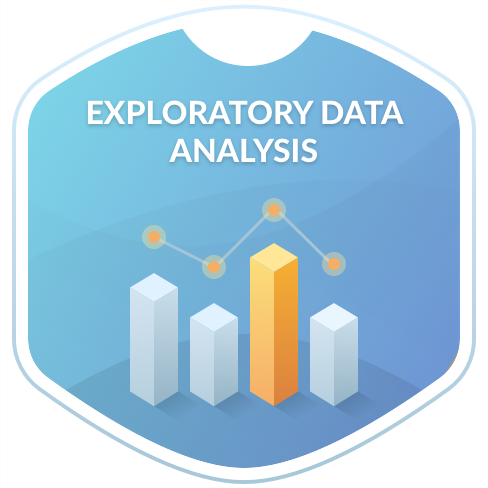

# Univariate analysis

In [49]:
# Set the color coding for the visualizations to be plotted
from matplotlib import cm
import seaborn as sns 
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')
sns.set_style('whitegrid')

# Explore target variable

In [50]:
# Extract the data for each location and store as separate time series data
location_name_list = data_final["LocationName"].unique()
each_location_data = []
for location_name in location_name_list:
   each_location_data.append(data_final[data_final["LocationName"] == location_name])

# Weekly distribution of data for the first two years

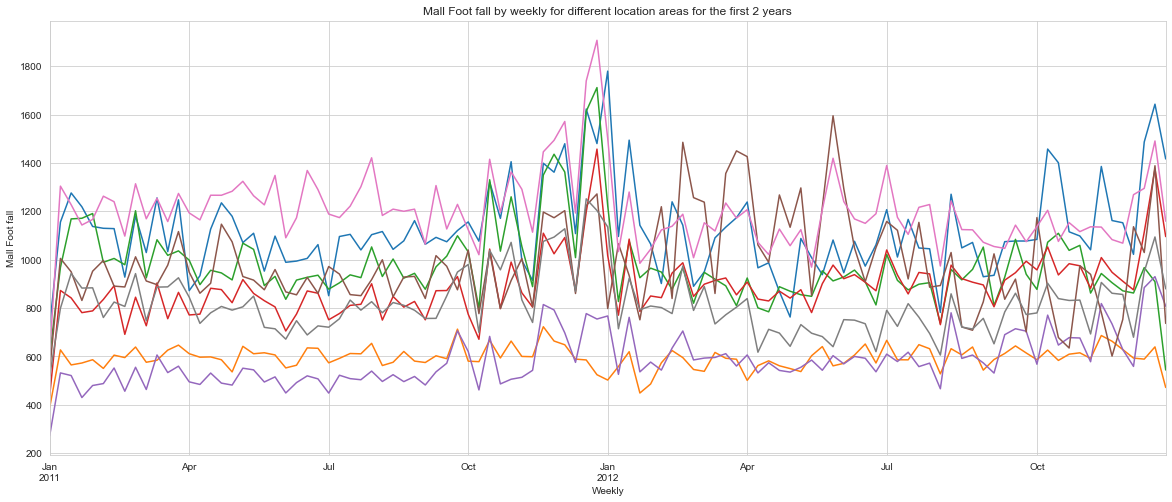

In [51]:
for i in range(len(each_location_data)):
  each_location_data[i][0:24*7*52*2].InCount.resample('W').mean().plot(figsize = (20,8))
  plt.xlabel('Weekly')
  plt.ylabel('Mall Foot fall')
  plt.title("Mall Foot fall by weekly for different location areas for the first 2 years")

# Weekly distribution of data for the last two years

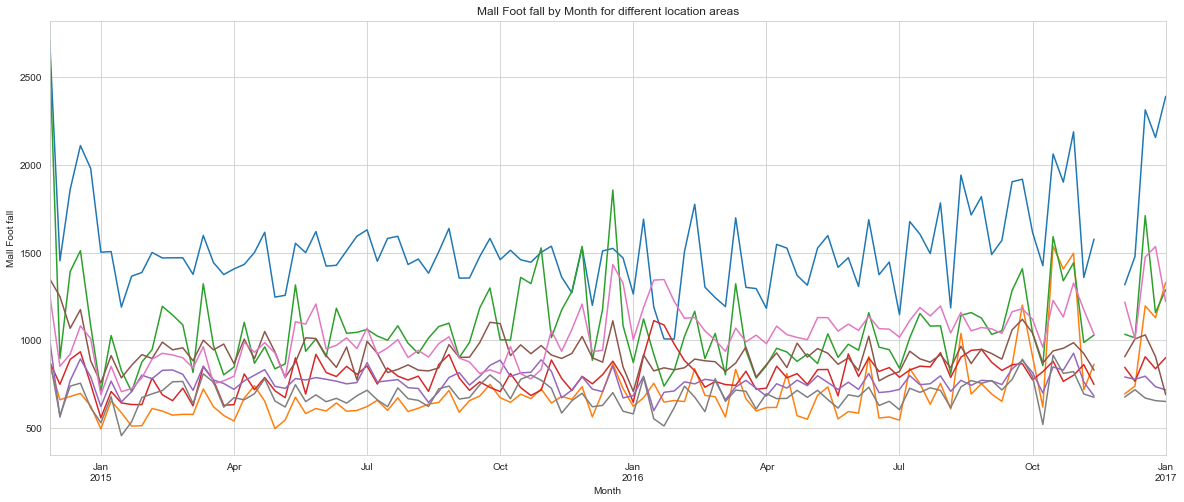

In [52]:
for i in range(len(each_location_data)):
  each_location_data[i][-24*7*52*2:].InCount.resample('W').mean().plot(figsize = (20,8))
  plt.xlabel('Month')
  plt.ylabel('Mall Foot fall')
  plt.title("Mall Foot fall by Month for different location areas")

# `Observation : During last weeks of Dec/first week of Jan, there is a peak in the footfall

# Explore the monthly distribution of data

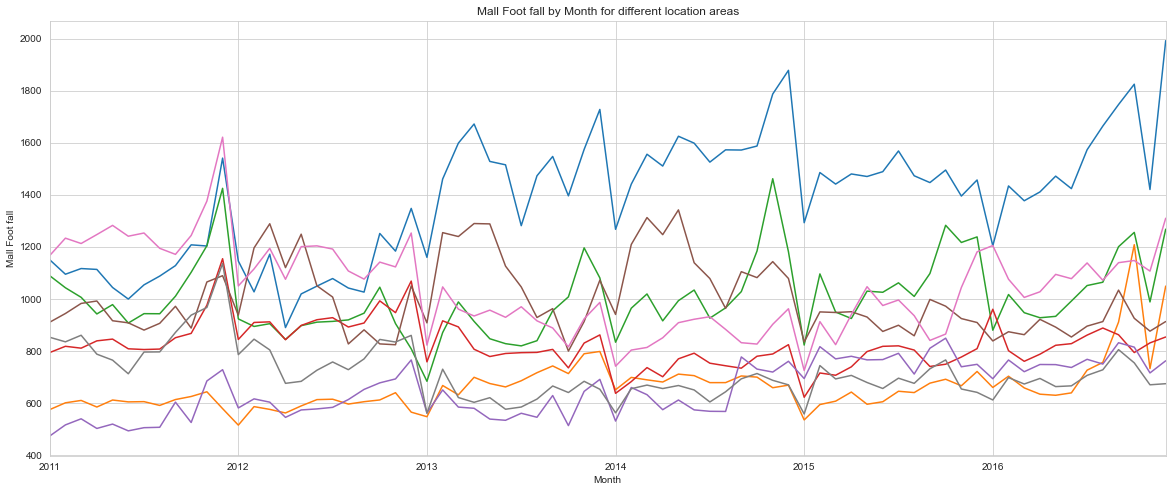

In [53]:
for i in range(len(each_location_data)):
  each_location_data[i].InCount.resample('M').mean().plot(figsize = (20,8))
  plt.xlabel('Month')
  plt.ylabel('Mall Foot fall')
  plt.title("Mall Foot fall by Month for different location areas")

# Same observation as before - peak in the month of December

# Yearly distribution of data

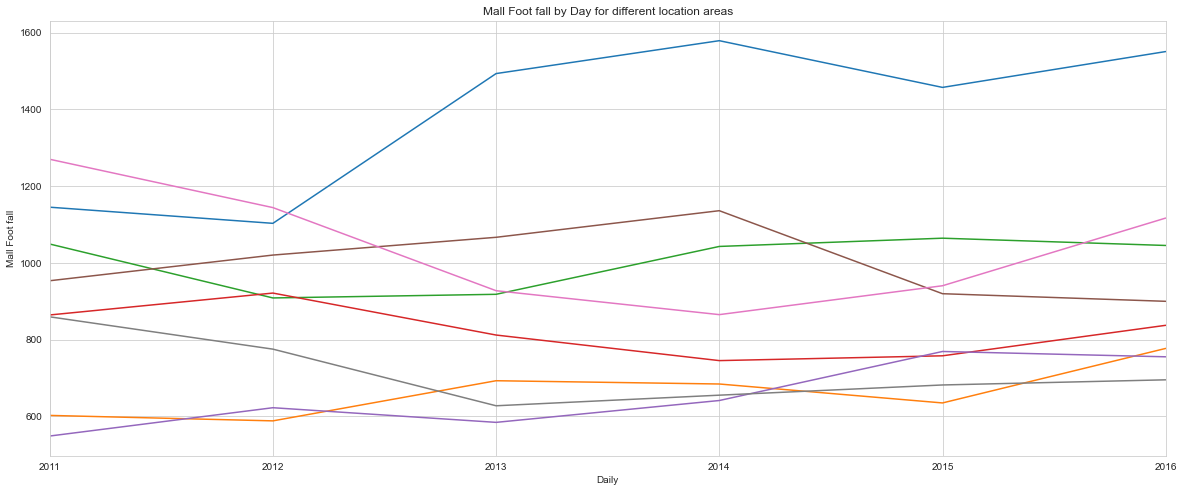

In [54]:
for i in range(len(each_location_data)):
  each_location_data[i].InCount.resample('Y').mean().plot(figsize = (20,8))
  plt.xlabel('Daily')
  plt.ylabel('Mall Foot fall')
  plt.title("Mall Foot fall by Day for different location areas")

# Observation : There is no specific pattern year on year

# Distribution of data in a day ( Bar chart)

In [55]:
def plot_differentgraphs(each_location_data, plot_type = 'boxplot', nrows=4, barplot_x='Hour', barplot_y ='InCount'):
  location_area_index = 0
  for i in range(nrows):
    fig = plt.figure(figsize=(16,8)) 
    ax1 = fig.add_subplot(1, 2, 1)
    

    if(plot_type == 'boxplot'): 
      ax1.boxplot(each_location_data[location_area_index].InCount)
    elif(plot_type == 'histogram'):
      n, bins, patches = ax1.hist(each_location_data[location_area_index].InCount, bins=200, color='b')
    elif(plot_type == 'barplot'):
      ax1 = sns.barplot(x=barplot_x,y=barplot_y,data=each_location_data[location_area_index], ci=False)
    location_name = each_location_data[location_area_index].LocationName.unique()
    ax1.set_xlabel('Mall foot fall for ' + location_name )
    ax1.set_ylabel('Frequency')
    ax1.set_title('Mall foot fall histogram for ' + location_name)
    location_area_index +=1

    ax2 = fig.add_subplot(1, 2, 2)
    if(plot_type == 'boxplot'): 
      ax2.boxplot(each_location_data[location_area_index].InCount)
    elif(plot_type == 'histogram'):
      n, bins, patches = ax2.hist(each_location_data[location_area_index].InCount, bins=200, color='r')
    elif(plot_type == 'barplot'):
      ax2 = sns.barplot(x=barplot_x,y=barplot_y,data=each_location_data[location_area_index], ci=False)

    location_name = each_location_data[location_area_index].LocationName.unique()
    ax2.set_xlabel('Mall foot fall for ' + location_name )
    ax2.set_ylabel('Frequency')
    ax2.set_title('Mall foot fall histogram for ' + location_name)
    location_area_index +=1

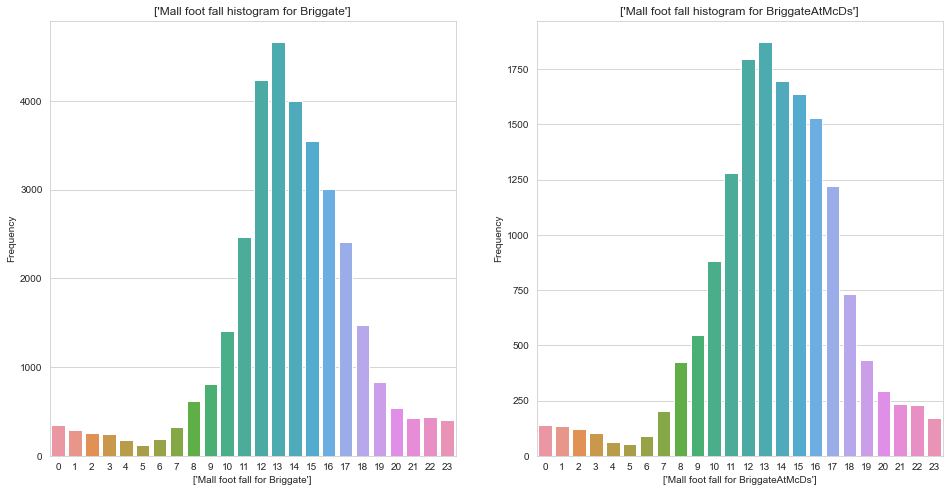

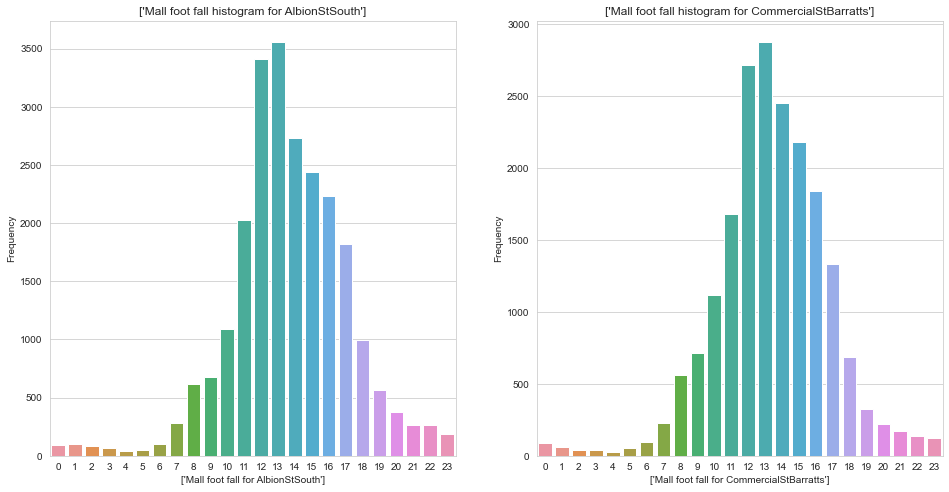

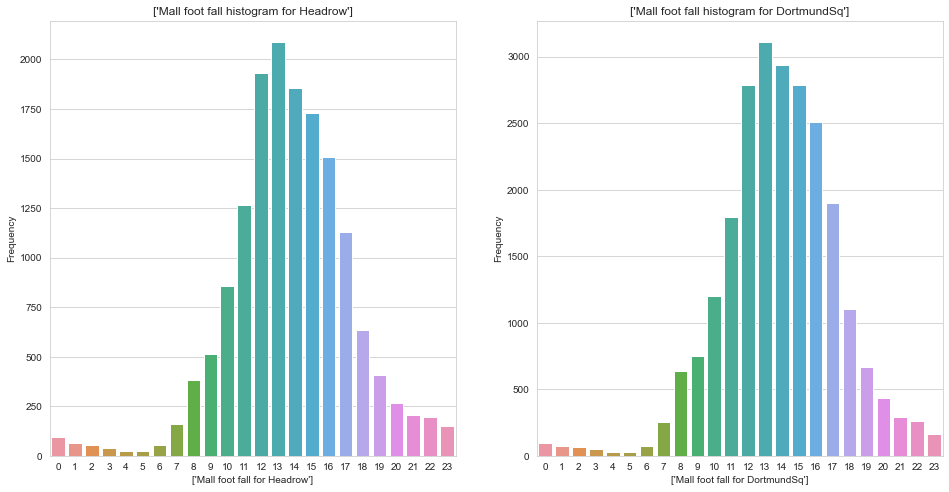

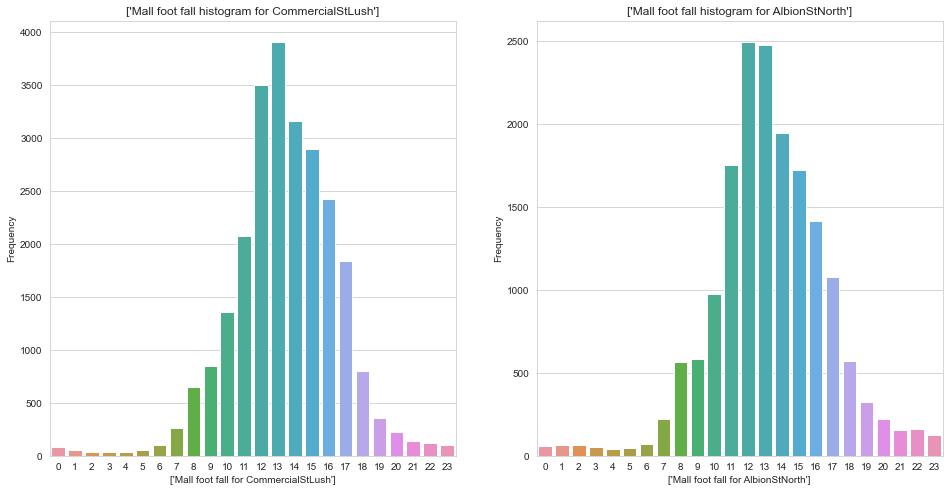

In [56]:
plot_differentgraphs(each_location_data, plot_type = 'barplot' )

# Observation : As expected, peak footfall is in the middle of the day ( 11AM-5.00PM)

# Max and Min values for FootFall

In [57]:
for i in range(len(each_location_data)):
  print("min max range for location ", each_location_data[i].LocationName.unique())
  print("max", max(each_location_data[i].InCount))
  print("min", min(each_location_data[i].InCount))

min max range for location  ['Briggate']
max 19820
min 0
min max range for location  ['BriggateAtMcDs']
max 5846
min 0
min max range for location  ['AlbionStSouth']
max 14685
min 0
min max range for location  ['CommercialStBarratts']
max 9571
min 0
min max range for location  ['Headrow']
max 6717
min 0
min max range for location  ['DortmundSq']
max 10073
min 0
min max range for location  ['CommercialStLush']
max 12342
min 0
min max range for location  ['AlbionStNorth']
max 7302
min 0


# Histogram charts for FootFall

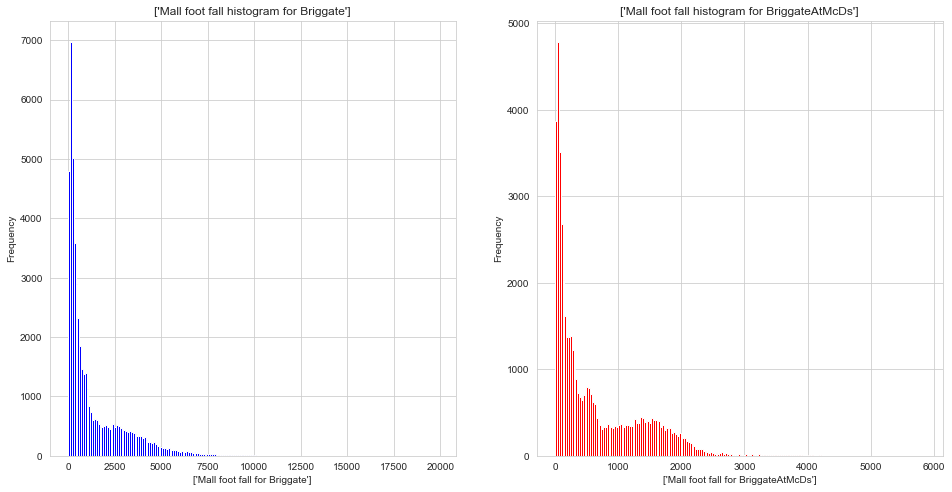

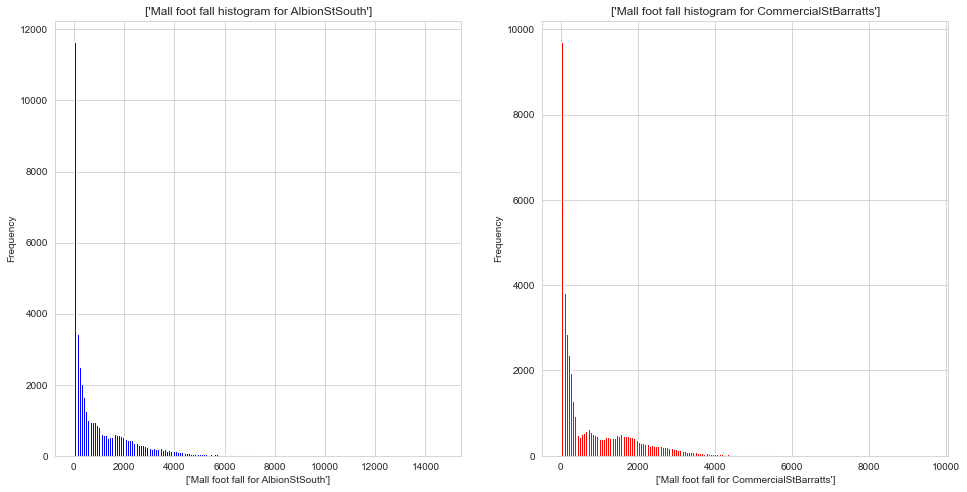

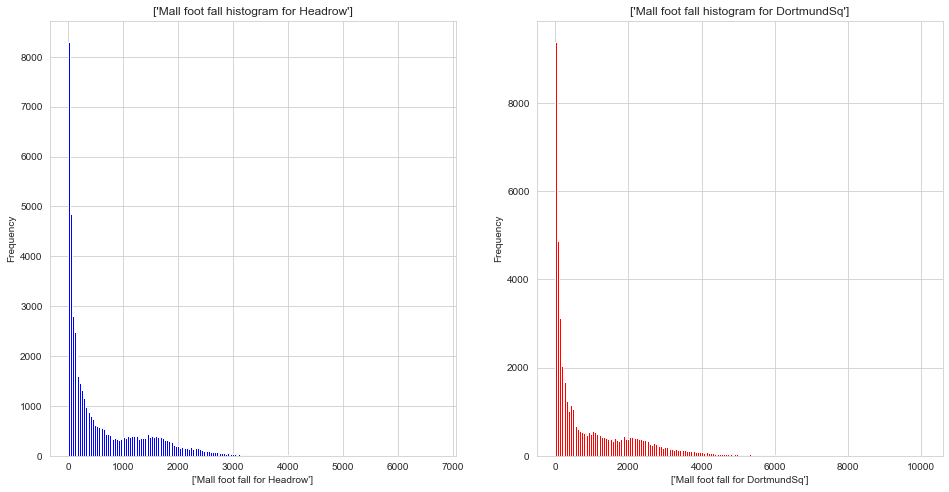

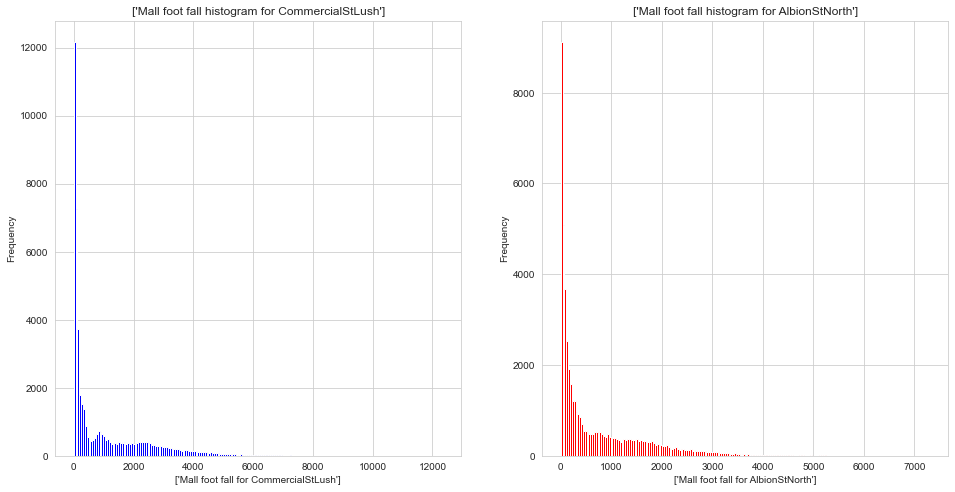

In [58]:
plot_differentgraphs(each_location_data, plot_type='histogram')

# We observe differet patterns of frequency of mall visit in different location areas

# Outlier plots

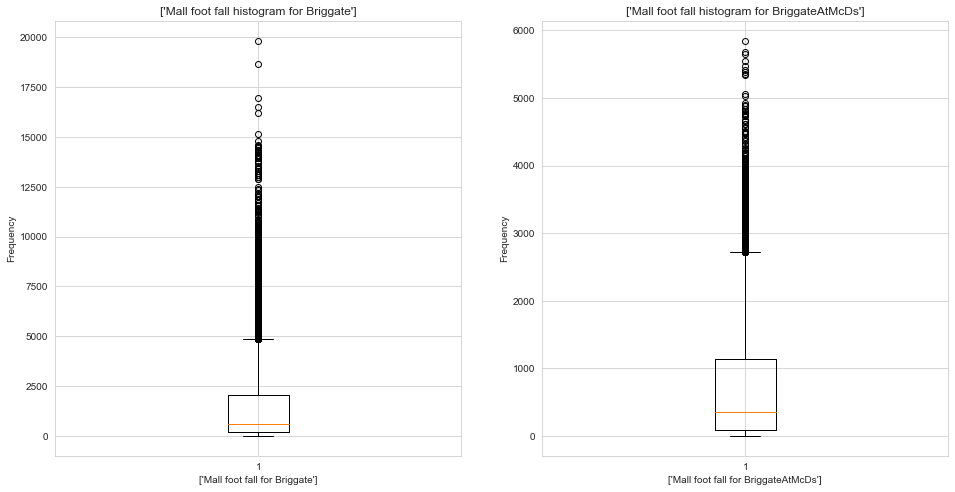

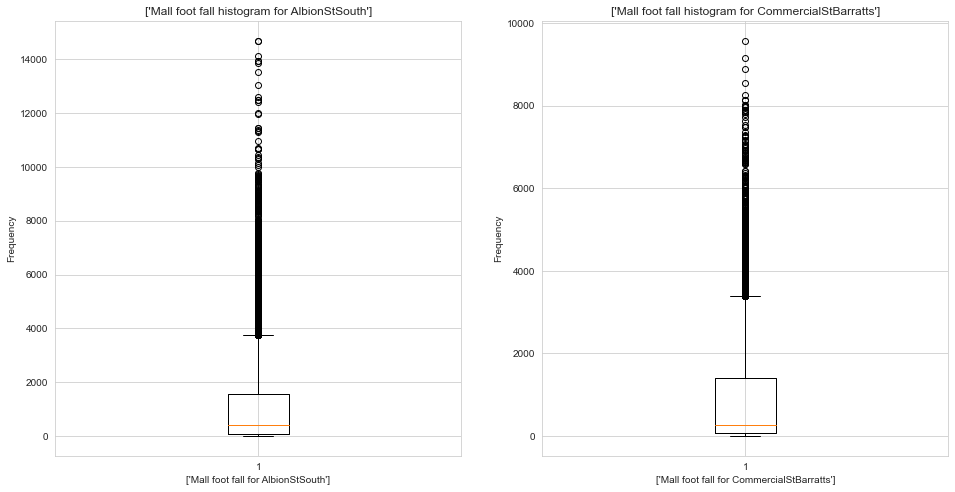

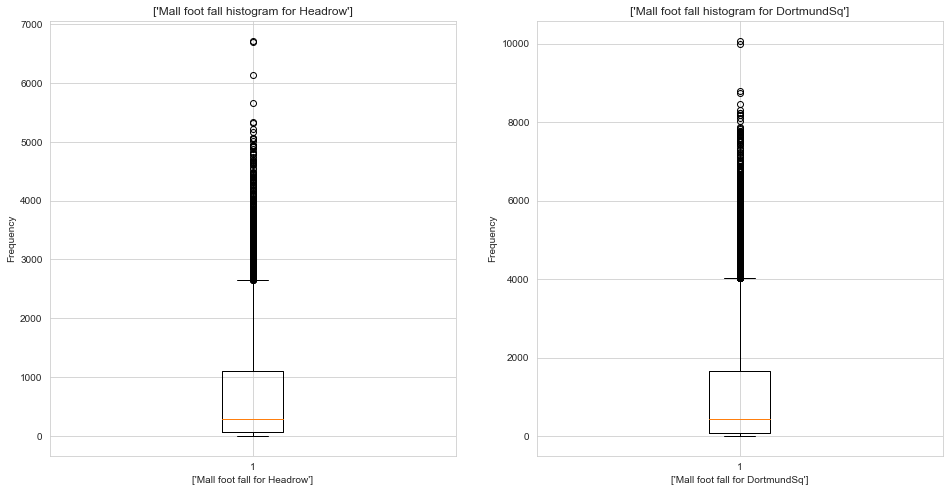

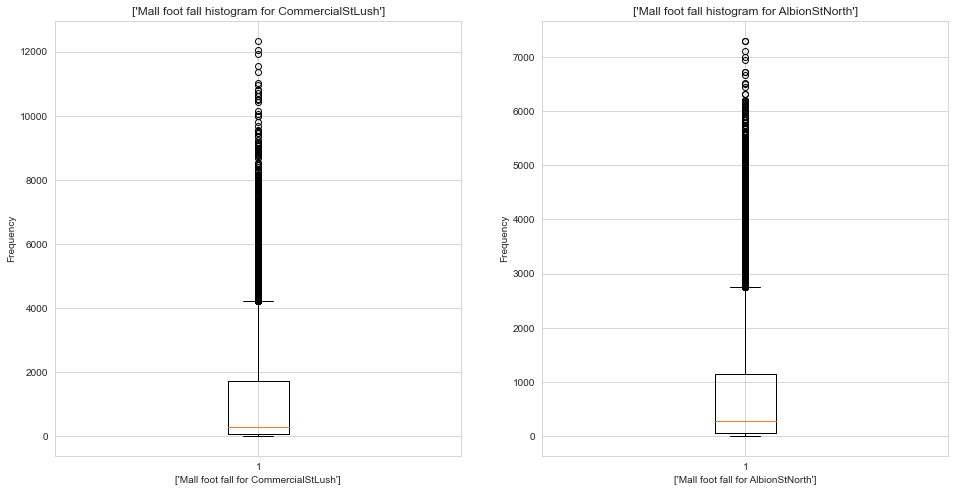

In [59]:
plot_differentgraphs(each_location_data, plot_type='boxplot')

# Observation : There are some outliers, we need to further investigate